## Santander Customer Transaction Prediction

#### Introduction and Overview :
At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

### Problem Statement
Build model to predict whether customer will make a particular transaction or not.

### Data Description
We are provided with an  anonymized dataset containing numeric feature(200) variables, the binary target column, and a string ID_code column.

The task is to predict the value of target column in the test set.

<h5>File descriptions</h5>

train.csv - the training set.

test.csv - the test set. The test set contains some rows which are not included in scoring.

sample_submission.csv - a sample submission file in the correct format

### Evaluation Metrics
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

<h5>Submission File</h5>

For each Id in the test set, you must make a binary prediction of the target variable. The file should contain a header and have the following format:

<h6>ID_code,target</h6>

test_0,0

test_1,1

test_2,0
etc.



## Solution 

#### Read csv  and  filter 200 features from it

In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/proj_1/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/proj_1/')

In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/proj_1/test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/proj_1/')

In [21]:
import pandas as pd
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/proj_1/train.csv', index_col=0)
target = 'target'

features = [i for i in data.columns if i != target]

print(data.shape, len(features))
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(200000, 201) 200


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#### Read test csv and keep index_col as ID_Code

In [22]:
test = pd.read_csv('/content/drive/My Drive/proj_1/test.csv', index_col=0)
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,0.8804,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,8.8336,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,0.3695,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Exploratory Data Analysis

#### Drop duplicates if any

In [0]:
data.drop_duplicates(keep='first',inplace=True)

#### Shape of data after drop duplicates (No duplicate)

In [0]:
data.shape

(200000, 201)

#### Observation
There is no duplicate in the train data.

In [0]:
data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### Percentage of value for each class(Imbalance data)

In [0]:
data.target.value_counts()/data.shape[0] *100

0    89.951
1    10.049
Name: target, dtype: float64

#### Observation
1. Around 90 percent data belong to Class 0 and approx. 10 percent belong to Class 1.
2. It is an imbalance data two class classification problem.

#### Check for  missing values rows

In [0]:
data.isnull().sum().sort_values()

target     0
var_126    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_61     0
var_199    0
Length: 201, dtype: int64

#### Observation
1. There are no missing values in train data.

#### Box plot for var_2 ,var_10 and var_25

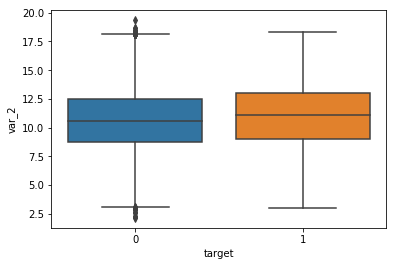

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="target",y="var_2",data=data)

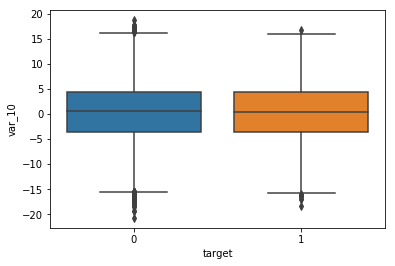

In [0]:
sns.boxplot(x="target",y="var_10",data=data)

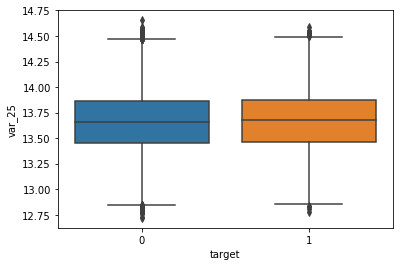

In [0]:
sns.boxplot(x="target",y="var_25",data=data)

#### Observation
1. Presence of diamond shape peaked at minima and maxima in above box plots suggest that there are outliers in the data.
2. In case of var_2, the outliers are only there  for target 0 .
3. In case of var_10 and var_25 , there are outliers for both target 0 and target 1. 

#### Conclusion
We will look at futher percentile level to identify outliers for sample feature i.e. var_10 .

#### Approach 1 : Percentile method for outlier removal

##### Finding upper bound (maxima) 

In [0]:
for i in np.arange(0.0, 1.0, 0.1):
    var =data["var_10"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 11.9777
99.1 percentile value is 12.088
99.2 percentile value is 12.2104
99.3 percentile value is 12.347000000000001
99.4 percentile value is 12.4978
99.5 percentile value is 12.6769
99.6 percentile value is 12.8937
99.7 percentile value is 13.1359
99.8 percentile value is 13.4987
99.9 percentile value is 14.1528
100 percentile value is  18.6702


##### Finding lower bound (minima) 

In [0]:
for i in np.arange(0.0, 1, 0.1):
    var =data["var_10"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(0+i,var[int(len(var)*(float(0+i)/100))]))

0.0 percentile value is -20.7313
0.1 percentile value is -14.7729
0.2 percentile value is -13.9897
0.30000000000000004 percentile value is -13.4133
0.4 percentile value is -13.0439
0.5 percentile value is -12.7568
0.6000000000000001 percentile value is -12.4935
0.7000000000000001 percentile value is -12.3016
0.8 percentile value is -12.0763
0.9 percentile value is -11.8839


In [0]:
data_after_outlier_removal_combined=data[((data.var_10>=-14.7729) & (data.var_10<=14.1528))]

In [0]:
data_after_outlier_removal_combined.shape

(199601, 201)

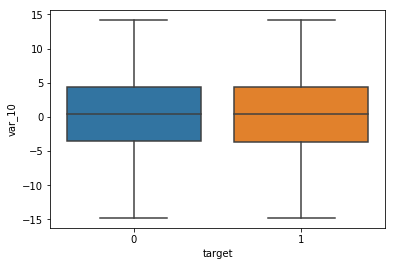

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="target",y="var_10",data=data_after_outlier_removal_combined)

#### Approach 2: Outlier removal using Beyond IQR Range 

In [0]:
d_var_10=data

In [0]:
var =d_var_10['var_10'].values
var = np.sort(var,axis = None)
minima=var[int(len(var)*(float(25.0)/100))]-1.5*(var[int(len(var)*(float(75.0)/100))]-var[int(len(var)*(float(25.0)/100))])
maxima=var[int(len(var)*(float(75.0)/100))]+1.5*(var[int(len(var)*(float(75.0)/100))]-var[int(len(var)*(float(25.0)/100))])  
d_var_10=d_var_10[((d_var_10['var_10']>=minima) & (d_var_10['var_10']<=maxima))]

In [0]:
d_var_10.shape

(199875, 201)

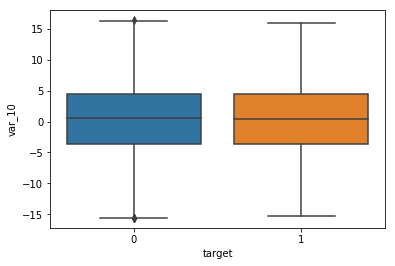

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="target",y="var_10",data=d_var_10)

#### Conclusion after var_10 outlier removal 

1. Approach 1 : Outlier removal  percentage data lost= 2 percent.
2. Approach 2 : Outlier removal  percentage data lost= .06 percent.
3. Hence We can use the Approach 2 outlier removal strategy for all other features such as var_0 to var_199.

In [0]:
### Function for finding lower_bound and upper_bound

def lower_bound_fn(feature):
  """This function return lower bound i.e. data point which is lowest point in  IQR range"""
    var =data[feature].values
    var = np.sort(var,axis = None)
    # result= 25th percentile-1.5 *(75th percentile -25th percentile)
    result=var[int(len(var)*(float(25.0)/100))]-1.5*(var[int(len(var)*(float(75.0)/100))]-var[int(len(var)*(float(25.0)/100))])
    return result
def upper_bound_fn(feature):
  """This function return upper bound i.e.highest data  point in  IQR range"""
    var =data[feature].values
    var =data[feature].values
    var = np.sort(var,axis = None)
    # result= 75th percentile+1.5 *(75th percentile -25th percentile)
    result=var[int(len(var)*(float(75.0)/100))]+1.5*(var[int(len(var)*(float(75.0)/100))]-var[int(len(var)*(float(25.0)/100))])
    return result

In [0]:
from tqdm import tqdm 
lower_bound=[]
upper_bound=[]
for i in tqdm(features):
    a=lower_bound_fn(i)
    b=upper_bound_fn(i)
    lower_bound.append(a)
    upper_bound.append(b)

100%|██████████| 200/200 [00:07<00:00, 26.28it/s]


In [0]:
print(len(lower_bound))
print(len(upper_bound))

200
200


In [0]:
df=data

In [0]:
for i in tqdm(range(200)): 
    a=lower_bound[i]
    b=upper_bound[i]
    df=df[((df['var_'+str(i)]>=a) & (df['var_'+str(i)]<=b))]

100%|██████████| 200/200 [00:15<00:00, 13.72it/s]


In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/data_cleaned.sav'
pickle.dump(df, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/data_cleaned.sav'
data_cleaned = pickle.load(open(filename, 'rb'))

#### Shape of data after outlier removal

In [0]:
data_cleaned.shape

(175107, 201)

In [0]:
data_cleaned.target.value_counts()

0    158002
1     17105
Name: target, dtype: int64

####  Check Correlation between features

#### Scatter plot to check correlation between feature i.e. var_0 and var_1

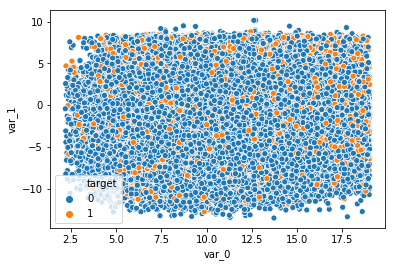

In [0]:
sns.scatterplot(x=data_cleaned['var_0'], y=data_cleaned['var_1'], hue=data_cleaned['target'])

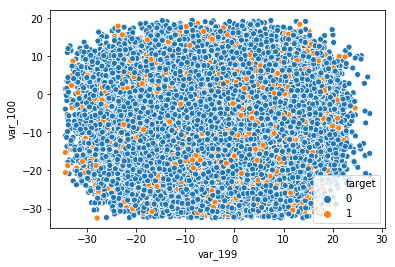

In [0]:
sns.scatterplot(x=data_cleaned['var_199'], y=data_cleaned['var_100'], hue=data_cleaned['target'])

#### Observation

1. There seems to be no or very less correlation between var_0 and var_1   and  var_100 and var_199.

In [0]:
###https://www.kaggle.com/gpreda/santander-eda-and-prediction
correlations = data_cleaned[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,var_26,var_76,1.355562e-07
1,var_76,var_26,1.355562e-07
2,var_115,var_96,1.446246e-07
3,var_96,var_115,1.446246e-07
4,var_162,var_113,3.227749e-07
5,var_113,var_162,3.227749e-07
6,var_66,var_187,5.188254e-07
7,var_187,var_66,5.188254e-07
8,var_24,var_85,7.484635e-07
9,var_85,var_24,7.484635e-07


In [0]:
correlations.tail(10)

,level_0,level_1,0
39790,var_123,var_12,0.009513
39791,var_12,var_123,0.009513
39792,var_166,var_12,0.009649
39793,var_12,var_166,0.009649
39794,var_183,var_189,0.009765
39795,var_189,var_183,0.009765
39796,var_139,var_26,0.009787
39797,var_26,var_139,0.009787
39798,var_127,var_162,0.010177
39799,var_162,var_127,0.010177


#### Observations
1. var_26 and var_76 have a lowest correlation value of 1.355562e-07 amongst all other features.
2. var_162 and var_127 have a  highest correlation  value of 0.010177 among all other features.
3. Hence,All features are very least correlated with each other .

#### Conclusion
There is no  Multicollinearity (as very less correlation) i.e. there will no degradation of performance of model.

#### Histogram plot for  some features

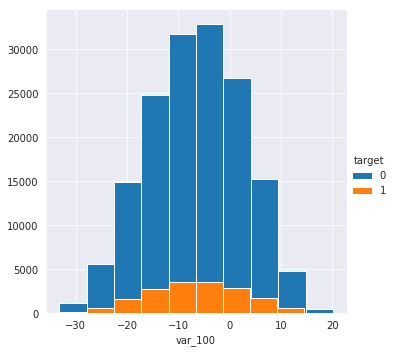

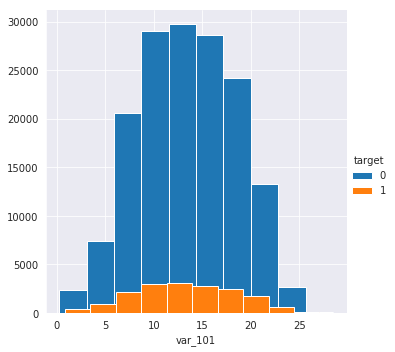

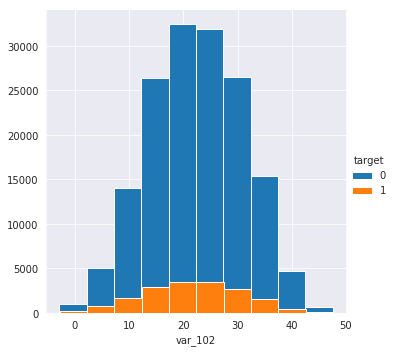

In [0]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid");
for i in list(features[100:103]):
  sns.FacetGrid(data_cleaned, hue="target", height=5) \
  .map(plt.hist,i)\
  .add_legend();

#### Observation
1. Some of values have verify high frequency. Hence, we can use some featurization around duplicate value.
2. The Spread of Class 1 is more as compared to Class 0 for each of the feature. 

### Conclusion after EDA 
1. We have cleaned data by removing outliers which may help us lesser performance impact on model.
2. All features are very less correlated i.e.Correlation imply dependency.Hence , We can use Naive Bayes as baseline model.
3. Also Naive Bayes have very less computation cost as compared to other simpler models.
4. Some of values have verify high frequency. Hence, we can use some featurization around duplicate value. 


####  Modeling with original 200 features

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/data_cleaned.sav'
data_cleaned = pickle.load(open(filename, 'rb'))

In [0]:
data_cleaned.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,0.8010,-0.6192,13.6380,1.2589,8.1939,14.9894,12.0763,-1.4710,6.7341,14.8241,19.7172,11.9882,1.0468,3.8663,4.7252,13.9427,-1.2796,-4.3763,5.1494,0.4124,-5.0732,4.9010,1.5459,15.6423,10.7209,15.1886,1.8685,7.7223,5.5317,...,16.5552,5.3739,6.4487,11.5631,1.3847,14.9638,2.8455,-9.0953,3.8278,5.9714,-6.1449,-2.0285,18.4106,1.4457,21.8853,9.2654,-6.5247,10.7687,-7.6283,1.0208,7.1968,11.1227,2.2257,6.4056,21.0550,-13.6509,4.7691,-8.9114,15.1007,2.4286,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [0]:
def split_train_test(data):
  """This function will train and cv data point """
    from sklearn.model_selection import train_test_split
    df=data.drop(['target'],axis=1)
    y=data['target']
    X_train, X_cv, y_train, y_cv = train_test_split(df, y, test_size = 0.20, stratify=y)
    print('Train data shape : '+str(X_train.shape))
    print('CV data shape : '+str(X_cv.shape))
    return X_train,y_train,X_cv,y_cv

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data_cleaned)

Train data shape : (140085, 200)
CV data shape : (35022, 200)


In [0]:
def grid_search(clf,params,n_folds,X_train,y_train,jobs):
    """It will do hyperparameter tuning using grid search and return best parameters"""
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    cv_method = StratifiedKFold(n_splits=n_folds)
    gs = GridSearchCV(estimator=clf, 
                     param_grid=params, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc',n_jobs=jobs)
    gs.fit(X_train, y_train)
    print('best param : '+str(gs.best_params_))
    print('best score : '+str(gs.best_score_))
    return gs.best_params_

#### Naive Bayes with  200  original features 

In [0]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


best param : {'var_smoothing': 1.873817422860383e-08}
best score : 0.8873297741295822


In [0]:
#https://github.com/ClimbsRocks/machineJS/issues/176
def baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat):
    gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=best_param['var_smoothing'])
    gnb.fit(X_train, y_train)
    y_train_pred = gnb.predict(X_train)
    y_cv_pred = gnb.predict(X_cv)
    predictions=gnb.predict(test[best_feat])
    test=test.reset_index()
    submission = pd.DataFrame({"ID_code": test.ID_code.values})
    submission['target'] = predictions
    submission.to_csv("/content/drive/My Drive/proj_1/submission_nb.csv", index=False)
    print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
    print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

    return y_train_pred,y_cv_pred

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
best_param={'var_smoothing':1.873817422860383e-08}
best_feat=test.columns
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.8064593228802196
cv auc score : 0.8110171262604674


In [0]:
%matplotlib inline
def auc_plot(y_train,y_train_pred,y_cv,y_cv_pred):
    """It will plot tpr vs fpr plot """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_cv_pred)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="cv AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.title("AUC PLOT")
    plt.grid()
    plt.show()

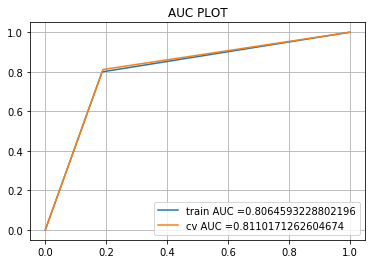

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.80495
2. Public Score : 0.80560

#### SVM(Support Vector Machine) with 200 original features 

In [0]:
from sklearn.linear_model import SGDClassifier

params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.9min finished


best param : {'alpha': 0.04132012400115335}
best score : 0.847044723236534


In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=100,tol=1e-3,alpha = 0.04132012400115335) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7701222352605119
cv auc score : 0.7699004165511137


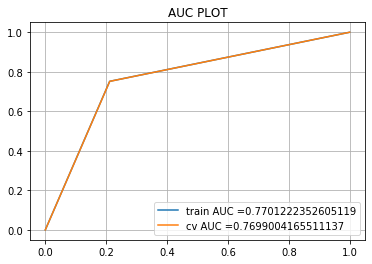

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=sgd.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_sgd.csv", index=False)

##### Kaggle Score
1. Private Score: 0.76828
2. Public Score : 0.76753

#### Xgboost with 200 original features 

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,cv=5,scoring = 'roc_auc',n_jobs=-1)
random_cfl.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 149.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 157.3min remaining: 34.5min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 175.5min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 179.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 7, 10], 'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=10)

In [0]:
random_cfl.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.1, gamma=0,
       learning_rate=0.15, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.1, gamma=0,
       learning_rate=0.15, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_cv_pred=xgb.predict(X_cv)

In [0]:
from sklearn.metrics import roc_auc_score
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.740013113092765
cv auc score : 0.6744246194703672


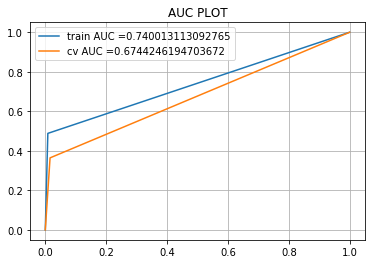

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=xgb.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_xgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.67655
2. Public Score : 0.67846

#### lightgbm with 200 original features 

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=15, n_folds=10, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8312   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.8719   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.8612   |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.8709   |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.8707   |  0.9709   |  0.2368   |  0

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9888504387768287,
 'boost_from_average': False,
 'feature_fraction': 0.1522821422842494,
 'is_unbalance': True,
 'lambda_l1': 0.29162576402836243,
 'lambda_l2': 0.5505010295618853,
 'learning_rate': 0.2855727327499761,
 'max_bin': 21,
 'max_depth': 79,
 'metric': 'auc',
 'min_data_in_leaf': 43,
 'min_sum_hessian_in_leaf': 40.03510879288107,
 'num_leaves': 25,
 'objective': 'binary',
 'subsample': 0.9562916362414675}

In [0]:
##https://www.kaggle.com/graf10a/lightgbm-lb-0-9675
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_200_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_200_model.sav'
lm = pickle.load(open(filename, 'rb'))
y_train_pred = lm.predict(X_train)
y_cv_pred=lm.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.9341250854691301
cv auc score : 0.8749140076665326


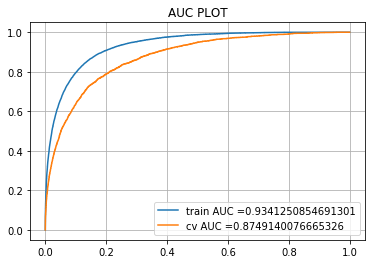

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=lm.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.86914
2. Public Score : 0.87191

### Featurization 1

#### Duplicate values per each feature

In [0]:
# https://www.kaggle.com/kakenovyernur/kakenov-yernur
unique_max_train = []
for feature in features:
    values = data_cleaned[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
duplicate_val_per_feat=pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value']).sort_values(by = 'Max duplicates', ascending=False)

In [0]:
duplicate_val_per_feat.head(5)

,Feature,Max duplicates,Value
68,var_68,961,5.0208
126,var_126,267,11.5356
108,var_108,267,14.1999
12,var_12,182,13.5545
91,var_91,60,7.0360


In [0]:
duplicate_val_per_feat.tail(5)

,Feature,Max duplicates,Value
61,var_61,6,-4.3454
136,var_136,6,16.8290
45,var_45,6,-2.8410
30,var_30,6,-0.0119
158,var_158,6,17.1384


#### Observation
All features have duplicate value. Hence, we can use duplicate value or not as feature.

#### Creating duplicate feature for each 200 feature ( set to 1 if duplicate else 0 )

In [0]:
##https://www.kaggle.com/super13579/lgbm-model-catboost?scriptVersionId=11574592
from tqdm import tqdm
for f in tqdm(features):
    data_cleaned[f+'dup'] = data_cleaned.duplicated(f,False).astype(int)

100%|██████████| 200/200 [00:04<00:00, 41.64it/s]


In [0]:
##https://www.kaggle.com/super13579/lgbm-model-catboost?scriptVersionId=11574592
from tqdm import tqdm
for f in tqdm(features):
    test[f+'dup'] = test.duplicated(f,False).astype(int)

100%|██████████| 200/200 [00:04<00:00, 40.57it/s]


In [0]:
data_cleaned.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190dup', 'var_191dup', 'var_192dup', 'var_193dup', 'var_194dup',
       'var_195dup', 'var_196dup', 'var_197dup', 'var_198dup', 'var_199dup'],
      dtype='object', length=401)

In [0]:
test.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190dup', 'var_191dup', 'var_192dup', 'var_193dup', 'var_194dup',
       'var_195dup', 'var_196dup', 'var_197dup', 'var_198dup', 'var_199dup'],
      dtype='object', length=400)

In [0]:
y=data_cleaned['target']
data_cle=data_cleaned.drop(['target'],axis=1)

In [0]:
new_features = [i for i in data_cle.columns]

In [0]:
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD( n_components = 300, random_state=42 )

trsvd = svd.fit_transform( data_cle )

cumVarianceExplained = np.cumsum( svd.explained_variance_ratio_ )

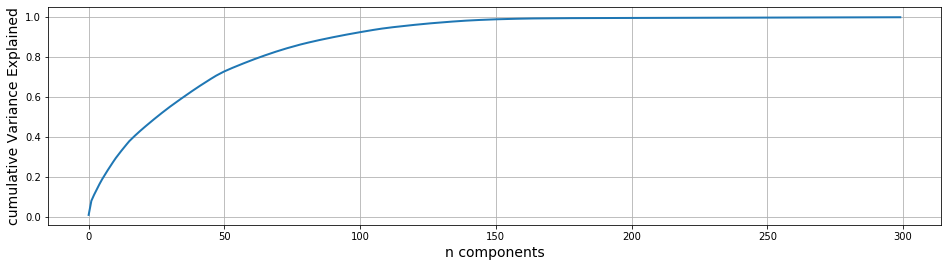

In [0]:
import matplotlib.pyplot as plt

plt.figure( figsize=(16, 4))
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [0]:
#https://stackoverflow.com/questions/44633571/how-can-i-get-the-feature-names-from-sklearn-truncatedsvd-object
best_features=[]
best_features = [new_features[i] for i in svd.components_[0].argsort()[::-1]]

#### Naive Bayes with top 125 features

In [0]:
best_feat=[]
best_feat=best_features[0:125]
best_feat.append('target')
len(best_feat)

126

In [0]:
best_feat

['var_120',
 'var_70',
 'var_160',
 'var_136',
 'var_102',
 'var_174',
 'var_172',
 'var_74',
 'var_73',
 'var_165',
 'var_77',
 'var_97',
 'var_109',
 'var_85',
 'var_194',
 'var_158',
 'var_107',
 'var_137',
 'var_21',
 'var_75',
 'var_150',
 'var_153',
 'var_49',
 'var_56',
 'var_7',
 'var_117',
 'var_198',
 'var_129',
 'var_188',
 'var_18',
 'var_48',
 'var_33',
 'var_81',
 'var_15',
 'var_96',
 'var_79',
 'var_108',
 'var_12',
 'var_25',
 'var_51',
 'var_101',
 'var_20',
 'var_156',
 'var_126',
 'var_184',
 'var_55',
 'var_92',
 'var_50',
 'var_125',
 'var_19',
 'var_143',
 'var_130',
 'var_60',
 'var_142',
 'var_67',
 'var_177',
 'var_175',
 'var_43',
 'var_104',
 'var_34',
 'var_87',
 'var_46',
 'var_121',
 'var_42',
 'var_4',
 'var_163',
 'var_94',
 'var_2',
 'var_0',
 'var_38',
 'var_24',
 'var_93',
 'var_31',
 'var_146',
 'var_159',
 'var_151',
 'var_181',
 'var_16',
 'var_41',
 'var_44',
 'var_186',
 'var_59',
 'var_197',
 'var_183',
 'var_88',
 'var_144',
 'var_106',
 'var_

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data_cleaned[best_feat])

Train data shape : (140085, 125)
CV data shape : (35022, 125)


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.1min finished


best param : {'var_smoothing': 2.782559402207126e-10}
best score : 0.8447760890564531


In [0]:
best_param['var_smoothing']=2.782559402207126e-10

In [0]:
best_feat=best_feat[:-1]

In [0]:
from sklearn.naive_bayes import GaussianNB
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test[best_feat],best_feat)

train auc score : 0.7644587056693022
cv auc score : 0.7591664421129501


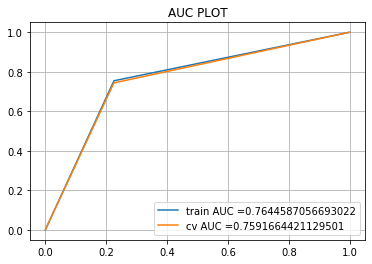

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.76306
2. Public Score : 0.75937

#### NB with top 150 features

In [0]:
best_feat=[]
best_feat=best_features[0:150]
best_feat.append('target')

In [0]:
best_feat

['var_120',
 'var_70',
 'var_160',
 'var_136',
 'var_102',
 'var_174',
 'var_172',
 'var_74',
 'var_73',
 'var_165',
 'var_77',
 'var_97',
 'var_109',
 'var_85',
 'var_194',
 'var_158',
 'var_107',
 'var_137',
 'var_21',
 'var_75',
 'var_150',
 'var_153',
 'var_49',
 'var_56',
 'var_7',
 'var_117',
 'var_198',
 'var_129',
 'var_188',
 'var_18',
 'var_48',
 'var_33',
 'var_81',
 'var_15',
 'var_96',
 'var_79',
 'var_108',
 'var_12',
 'var_25',
 'var_51',
 'var_101',
 'var_20',
 'var_156',
 'var_126',
 'var_184',
 'var_55',
 'var_92',
 'var_50',
 'var_125',
 'var_19',
 'var_143',
 'var_130',
 'var_60',
 'var_142',
 'var_67',
 'var_177',
 'var_175',
 'var_43',
 'var_104',
 'var_34',
 'var_87',
 'var_46',
 'var_121',
 'var_42',
 'var_4',
 'var_163',
 'var_94',
 'var_2',
 'var_0',
 'var_38',
 'var_24',
 'var_93',
 'var_31',
 'var_146',
 'var_159',
 'var_151',
 'var_181',
 'var_16',
 'var_41',
 'var_44',
 'var_186',
 'var_59',
 'var_197',
 'var_183',
 'var_88',
 'var_144',
 'var_106',
 'var_

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data_cleaned[best_feat])

Train data shape : (140085, 150)
CV data shape : (35022, 150)


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


best param : {'var_smoothing': 1.6681005372000592e-08}
best score : 0.8629465821720975


In [0]:
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.7700368482269374
cv auc score : 0.771088919377401


###### Kaggle Score
1. Private Score: 0.77180
2. Public Score: 0.76913

##### SVM with top 150 features

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.7min finished


best param : {'alpha': 0.012328467394420634}
best score : 0.8234957330517834


In [0]:
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=100,tol=1e-3,alpha = best_param['alpha']) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7339800722505375
cv auc score : 0.7330959105792029


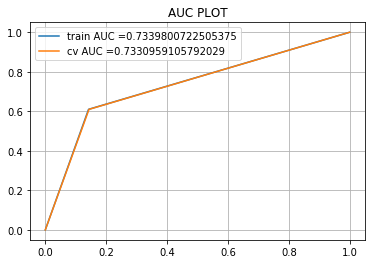

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
best_feat=best_feat[:-1]

In [0]:
predictions=sgd.predict(test[best_feat])

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_svm.csv", index=False)

##### Kaggle Score
1. Private Score :0.73673
2. Public Score: 0.72987

In [0]:
!pip install bayesian-optimization
!pip install scikit-optimize

#### Lightgbm with top 150 features

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=15, n_folds=10, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8074   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.8515   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.8365   |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.8476   |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.8487   |  0.9709   |  0.2368   |  0

In [0]:
##https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.996926204997424,
 'boost_from_average': False,
 'feature_fraction': 0.43942538998685643,
 'is_unbalance': True,
 'lambda_l1': 0.3309052418087291,
 'lambda_l2': 0.4669489881794176,
 'learning_rate': 0.24275827984778078,
 'max_bin': 148,
 'max_depth': 65,
 'metric': 'auc',
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 92.53585867436709,
 'num_leaves': 25,
 'objective': 'binary',
 'subsample': 0.6966790400075604}

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_150_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_150_model.sav'
lm = pickle.load(open(filename, 'rb'))
y_train_pred = lm.predict(X_train)
y_cv_pred=lm.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.9302401432479352
cv auc score : 0.856786137877206


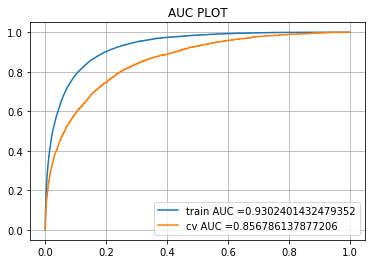

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
predictions=lm.predict(test[best_feat])

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.84961
2. Public Score : 0.85237

#### Select k best  features

In [0]:
y=data_cleaned['target']
data_cle=data_cleaned.drop(['target'],axis=1)

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(f_classif, k=399)
k=k_best.fit(data_cle,y)
features = k.transform(data_cle)

In [0]:
cumVarianceExplained = np.cumsum( k.scores_ )/np.sum(k.scores_)

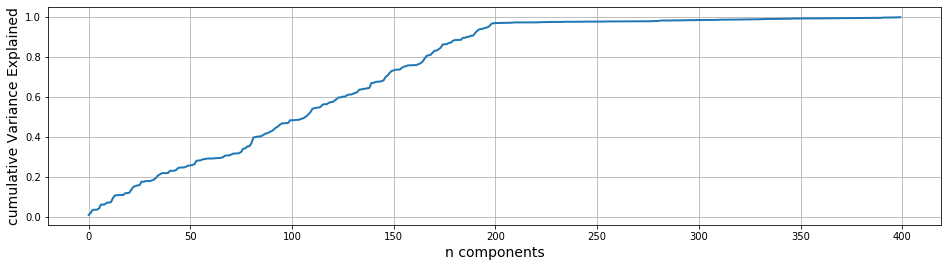

In [0]:
import matplotlib.pyplot as plt

plt.figure( figsize=(16, 4))
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [0]:
#https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
selector = SelectKBest(f_classif,k=200)
selector.fit(data_cle, y)
cols = selector.get_support(indices=True)
data_kbest = data_cle.iloc[:,cols]

In [0]:
best_feat=[]
best_feat=data_kbest.columns
print(best_feat)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8',
       'var_9', 'var_11',
       ...
       'var_133dup', 'var_139dup', 'var_146dup', 'var_154dup', 'var_163dup',
       'var_177dup', 'var_179dup', 'var_191dup', 'var_195dup', 'var_198dup'],
      dtype='object', length=200)


#### NB with top 200 features

In [0]:
from sklearn.model_selection import train_test_split
df=data_kbest

X_train, X_cv, y_train, y_cv = train_test_split(df, y, test_size = 0.20, stratify=y)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (140085, 200)
CV data shape : (35022, 200)


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


best param : {'var_smoothing': 0.0001668100537200059}
best score : 0.877904655709755


In [0]:
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.7877591237156714
cv auc score : 0.7894018326524787


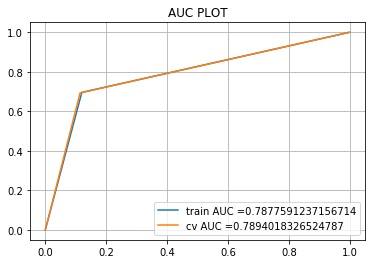

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.78190
2. Public Score : 0.78044

#### SVM with top 200 features

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.3min finished


best param : {'alpha': 0.012328467394420634}
best score : 0.8482980628677597


In [0]:
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=100,tol=1e-3,alpha = best_param['alpha']) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7267217928213
cv auc score : 0.7277705672788818


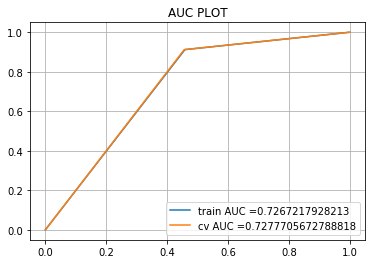

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
predictions=sgd.predict(test[best_feat])

In [0]:
test.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160dup,var_161dup,var_162dup,var_163dup,var_164dup,var_165dup,var_166dup,var_167dup,var_168dup,var_169dup,var_170dup,var_171dup,var_172dup,var_173dup,var_174dup,var_175dup,var_176dup,var_177dup,var_178dup,var_179dup,var_180dup,var_181dup,var_182dup,var_183dup,var_184dup,var_185dup,var_186dup,var_187dup,var_188dup,var_189dup,var_190dup,var_191dup,var_192dup,var_193dup,var_194dup,var_195dup,var_196dup,var_197dup,var_198dup,var_199dup
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_svm.csv", index=False)

##### Kaggle Score
1. Private Score: 0.73442
2. Public Score : 0.73360

#### Lightgbm with top 200 features

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=15, n_folds=10, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8333   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.8741   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.8644   |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.8719   |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.8712   |  0.9709   |  0.2368   |  0

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9972055022804187,
 'boost_from_average': False,
 'feature_fraction': 0.8386133653331375,
 'is_unbalance': True,
 'lambda_l1': 0.31065638082201175,
 'lambda_l2': 0.84764245541438,
 'learning_rate': 0.1300097487520304,
 'max_bin': 122,
 'max_depth': 24,
 'metric': 'auc',
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 94.34910369995325,
 'num_leaves': 70,
 'objective': 'binary',
 'subsample': 0.5231418824080631}

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_200_imp_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_200_imp_model.sav'
lm = pickle.load(open(filename, 'rb'))
y_train_pred = lm.predict(X_train)
y_cv_pred=lm.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))


train auc score : 0.9776347793029558
cv auc score : 0.8768146427788442


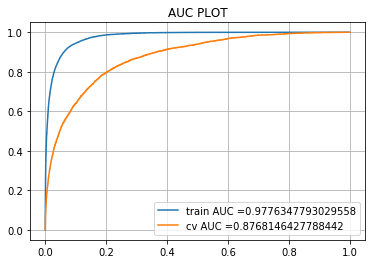

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=lm.predict(test[best_feat])
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)


##### Kaggle Score
1. Private Score: 0.87081
2. Public Score : 0.87319

#### Naive Bayes 400 feature (200 original and 200 duplicate flag) 

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data_cleaned)

Train data shape : (140085, 400)
CV data shape : (35022, 400)


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=50)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,8)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   24.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:  2.2min finished


best param : {'var_smoothing': 0.0002559547922699536}
best score : 0.877031186626097


In [0]:
best_feat=test.columns
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.7758777086224667
cv auc score : 0.7744404685797419


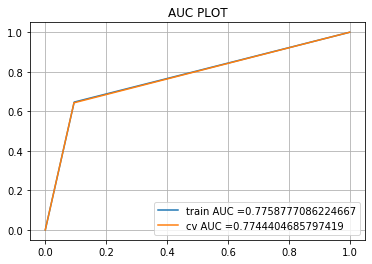

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.75314
2. Public Score : 0.75148

#### SVM with 400 feature (200 original and 200 duplicate flag) 

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.3min finished


best param : {'alpha': 0.030538555088334123}
best score : 0.8481811182275231


In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=100,tol=1e-3,alpha = 0.030538555088334123) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7729154243737795
cv auc score : 0.7728775358632812


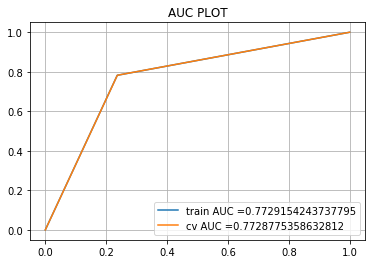

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=sgd.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_sgd.csv", index=False)

##### Kaggle Score
1. Private Score: 0.76438
2. Public Score : 0.76639

#### Xgboost with 400 features (200 original and 200 duplicate flag ) 

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,cv=5,scoring = 'roc_auc',n_jobs=-1)
random_cfl.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 57.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 62.6min


In [0]:
random_cfl.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_cv_pred=xgb.predict(X_cv)

In [0]:
from sklearn.metrics import roc_auc_score
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7964405330903326
cv auc score : 0.6700965148230289


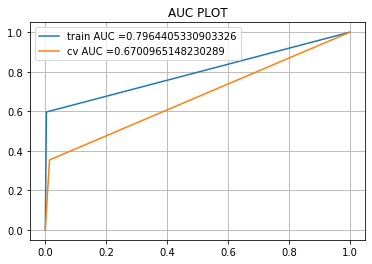

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=xgb.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_xgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.71413
2. Public Score : 0.70979

#### lightgbm with 400 features (200 original and 200 duplicate flag)

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=15, n_folds=10, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8329   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.8756   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.8608   |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.8714   |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.8708   |  0.9709   |  0.2368   |  0

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9972055022804187,
 'boost_from_average': False,
 'feature_fraction': 0.8386133653331375,
 'is_unbalance': True,
 'lambda_l1': 0.31065638082201175,
 'lambda_l2': 0.84764245541438,
 'learning_rate': 0.1300097487520304,
 'max_bin': 122,
 'max_depth': 24,
 'metric': 'auc',
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 94.34910369995325,
 'num_leaves': 70,
 'objective': 'binary',
 'subsample': 0.5231418824080631}

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_400_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/lgbm_400_model.sav'
lm = pickle.load(open(filename, 'rb'))
y_train_pred = lm.predict(X_train)
y_cv_pred=lm.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.979449312520355
cv auc score : 0.8741633718683267


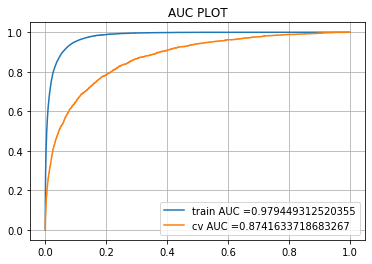

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=lm.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.86945
2. Public Score : 0.87246

### Featurization 2

#### Augmentation 

In [0]:
#https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)
        
        
    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

####  Min,Max,Median,Mean,standard-deviation and kurtosis features

In [0]:
#https://www.kaggle.com/gpreda/santander-eda-and-prediction
%%time
idx = features = data.columns.values[2:202]
for df in [data]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 3.3 s, sys: 27.9 ms, total: 3.33 s
Wall time: 3.34 s


In [0]:
#https://www.kaggle.com/gpreda/santander-eda-and-prediction
%%time
test = pd.read_csv('/content/drive/My Drive/proj_1/test.csv', index_col=0)
idx = features = test.columns.values[2:202]
for df in [test]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 10.6 s, sys: 196 ms, total: 10.8 s
Wall time: 11.1 s


In [0]:
train=data

In [0]:
print('train data shape'+str(train.shape))
print('test data shape'+str(test.shape))

train data shape(200000, 209)
test data shape(200000, 208)


In [0]:
from tqdm import tqdm
col=[]
for i in tqdm(range(200)):
    m='var_'+str(i)
    col.append(m)
train=train.drop(col,axis=1)
test=test.drop(col,axis=1)

100%|██████████| 200/200 [00:00<00:00, 335812.97it/s]


In [0]:
y=train['target']
train=train.drop(['target'],axis=1)

In [0]:
print('train data shape'+str(train.shape))
print('test data shape'+str(test.shape))

train data shape(200000, 8)
test data shape(200000, 8)


#### Naive Bayes with only 8 features(mean,median etc.)

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=100)}
best_param=grid_search(gnb,params_NB,5,train,y,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min


best param : {'var_smoothing': 3.5938136638046257e-09}
best score : 0.5286861796233061


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train, y, test_size = 0.20, stratify=y)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (160000, 8)
CV data shape : (40000, 8)


In [0]:
best_feat=test.columns
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.5199837754199206
cv auc score : 0.5215426480714824


##### Kaggle Score
1. Private Score: 0.50000
2. Public Score : 0.50000

#### lightgbm with 8 features only(mean,median,skew,min,max,std,sum and skew)

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(train, y, init_round=5, opt_round=15, n_folds=11, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.5448   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.5658   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.5565   |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.561    |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.5601   |  0.9709   |  0.2368   |  0

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9972055022804187,
 'boost_from_average': False,
 'feature_fraction': 0.8386133653331375,
 'is_unbalance': True,
 'lambda_l1': 0.31065638082201175,
 'lambda_l2': 0.84764245541438,
 'learning_rate': 0.1300097487520304,
 'max_bin': 122,
 'max_depth': 24,
 'metric': 'auc',
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 94.34910369995325,
 'num_leaves': 70,
 'objective': 'binary',
 'subsample': 0.5231418824080631}

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train, y, test_size = 0.20, stratify=y)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (160000, 8)
CV data shape : (40000, 8)


In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
y_train_pred = clf.predict(X_train)
y_cv_pred=clf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7575399241623532
cv auc score : 0.5489149582825175


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=clf.predict(test)
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.55095
2. Public Score : 0.55518

In [0]:
y=train['target']
train=train.drop(['target'],axis=1)

#### Select best k features

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(f_classif, k=207)
k=k_best.fit(train,y)
features = k.transform(train)

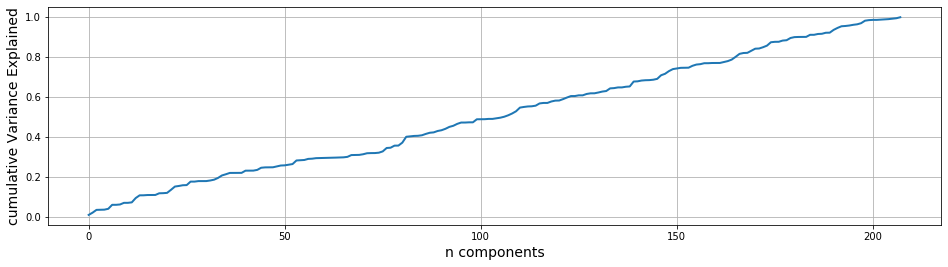

In [0]:
import matplotlib.pyplot as plt
cumVarianceExplained = np.cumsum( k.scores_ )/np.sum(k.scores_)
plt.figure( figsize=(16, 4))
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [0]:
#https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
selector = SelectKBest(f_classif,k=190)
selector.fit(train, y)
cols = selector.get_support(indices=True)
data_kbest = train.iloc[:,cols]

best_feat=[]
best_feat=data_kbest.columns
print(best_feat)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8',
       'var_9', 'var_11',
       ...
       'var_197', 'var_198', 'var_199', 'sum', 'max', 'mean', 'std', 'skew',
       'kurt', 'med'],
      dtype='object', length=190)


#### Naive Bayes with top 190 features

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train[best_feat], y, test_size = 0.20, stratify=y)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (160000, 190)
CV data shape : (40000, 190)


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(0,-11, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train[best_feat],y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


best param : {'var_smoothing': 1.2915496650148853e-07}
best score : 0.8825734087547039


In [0]:
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test[best_feat],best_feat)

train auc score : 0.8023868759342128
cv auc score : 0.8042870002405981


##### Kaggle Score
1. Private Score: 0.50000
2. Public Score : 0.50000

#### lightgbm with top 190 features

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample,lambda_l1,lambda_l2):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(train[best_feat], y, init_round=5, opt_round=15, n_folds=11, random_seed=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8419   |  0.9895   |  0.2812   |  0.5985   |  0.434    |  0.7665   |  20.37    |  31.81    |  74.58    |  45.61    |  78.98    |  0.8687   |
|  2        |  0.8747   |  0.9972   |  0.8386   |  0.3107   |  0.8476   |  0.13     |  122.1    |  23.79    |  25.76    |  94.35    |  70.26    |  0.5231   |
|  3        |  0.866    |  0.9747   |  0.5627   |  0.4556   |  0.6834   |  0.4252   |  103.3    |  50.65    |  26.33    |  96.6     |  66.49    |  0.6828   |
|  4        |  0.8769   |  0.8659   |  0.1212   |  0.8056   |  0.9731   |  0.2901   |  104.4    |  24.92    |  31.26    |  41.9     |  61.3     |  0.5222   |
|  5        |  0.8765   |  0.9709   |  0.2368   |  0

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9496636248581771,
 'boost_from_average': False,
 'feature_fraction': 0.8119744871330826,
 'is_unbalance': True,
 'lambda_l1': 0.586515432153725,
 'lambda_l2': 0.7571598185215849,
 'learning_rate': 0.19204304295071015,
 'max_bin': 23,
 'max_depth': 70,
 'metric': 'auc',
 'min_data_in_leaf': 24,
 'min_sum_hessian_in_leaf': 94.5976532519037,
 'num_leaves': 75,
 'objective': 'binary',
 'subsample': 0.5526438213080649}

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train[best_feat], y, test_size = 0.20, stratify=y)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (160000, 190)
CV data shape : (40000, 190)


In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
clf = lgb.train(opt_params, d_train)

In [0]:
y_train_pred = clf.predict(X_train)
y_cv_pred=clf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.9798753502883472
cv auc score : 0.8739105196640478


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=clf.predict(test[best_feat])
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.87044
2. Public Score : 0.87327

#### All  208 features

In [0]:
#https://www.kaggle.com/gpreda/santander-eda-and-prediction
%%time
idx = data.columns.values[2:201]
for df in [data]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 4.62 s, sys: 41.9 ms, total: 4.67 s
Wall time: 4.68 s


In [0]:
#https://www.kaggle.com/gpreda/santander-eda-and-prediction
%%time
test = pd.read_csv('/content/drive/My Drive/proj_1/test.csv', index_col=0)
idx = test.columns.values[1:200]
for df in [test]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 10.8 s, sys: 183 ms, total: 10.9 s
Wall time: 11.2 s


In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data)

Train data shape : (160000, 208)
CV data shape : (40000, 208)


#### NB with 208 features

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(2,-18, num=100)}
best_param=grid_search(gnb,params_NB,5,X_train,y_train,-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


best param : {'var_smoothing': 7.05480231071866e-14}
best score : 0.8828428927428436


In [0]:
best_feat=test.columns
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.805123507496776
cv auc score : 0.7986143490441069


##### Kaggle Score
1. Private Score: 0.79956
2. Public Score : 0.79951

#### SVM with 208 features

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=400,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,16)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   18.3s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  5.0min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 47.9min
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed: 61.5min finished


best param : {'alpha': 6.4280731172843194e-06}
best score : 0.8543793226071406


In [0]:
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=400,tol=1e-3,alpha = best_param['alpha']) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7757864176608676
cv auc score : 0.7678074330957774


In [0]:

#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=sgd.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_svm.csv", index=False)

##### Kaggle Score
1. Private Score: 0.76889
2. Public Score : 0.77222

#### Decision Tree with 208 features

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(data)

Train data shape : (160000, 208)
CV data shape : (40000, 208)


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight = 'balanced')

params={
       'max_depth' :[1, 5, 10, 50, 100,500,1000,2000,5000,10000,20000,30000],
       'min_samples_split':[10, 100, 500,1000,2000,5000,10000]
}
best_param=grid_search(dtc,params,5,X_train,y_train,16)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  15 | elapsed:  7.2min finished


best param : {'max_depth': 20000, 'min_samples_split': 2000}
best score : 0.6774159847151625


In [0]:
best_param={'max_depth': 20000, 'min_samples_split': 2000}

In [0]:
from sklearn.metrics import roc_auc_score
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_cv_pred=dtc.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.6741248804554278
cv auc score : 0.6343949374859997


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=dtc.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_dtc.csv", index=False)

##### Kaggle Score
1. Private Score: 0.62694
2. Public Score : 0.62779

#### Voting Classifier with 208 features

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
import numpy as np
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=7.05480231071866e-14)
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=1000,tol=1e-3,alpha = 6.4280731172843194e-06) 
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')

vcf = VotingClassifier(estimators=[('gnb', gnb), ('sgd', sgd), ('dtc', dtc)], voting='hard')
vcf = vcf.fit(X_train, y_train)

In [0]:
y_train_pred=vcf.predict(X_train)
y_cv_pred = vcf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7931603794960332
cv auc score : 0.7743007447476349


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=vcf.predict(test)
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_vcf.csv", index=False)

##### Kaggle Score
1. Private Score: 0.77758
2. Public Score : 0.77498

#### Stacking classifier with 208 features

In [0]:
#http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=7.05480231071866e-14)
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=1000,tol=1e-3,alpha = 6.4280731172843194e-06) 
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')

clf = StackingClassifier(classifiers=[sgd,dtc], meta_classifier=gnb)


In [0]:
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_cv_pred = clf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.771904963158689
cv auc score : 0.768198128313408


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=clf.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_stc.csv", index=False)

##### Kaggle Score
1. Private Score: 0.76782
2. Public Score : 0.76824

#### lightgbm 208 featuers without augmentation

In [0]:
train=data
y=train['target']
train=train.drop(['target'],axis=1)

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,bagging_freq,bagging_seed,reg_alpha,reg_lambda,min_gain_to_split,min_child_weight,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin,min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc','tree_learner': 'serial','verbosity': -1,'boost': 'gbdt'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params['bagging_freq']=int(bagging_freq)
        params['bagging_seed']=int(bagging_seed)
        params['reg_alpha']=reg_alpha
        params['reg_lambda']=reg_lambda
        params['min_gain_to_split']=min_gain_to_split
        params['min_child_weight']=min_child_weight
        params['num_leaves'] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'bagging_freq' :(4,10),
                                            'bagging_seed':(5,10),
                                            'reg_alpha' :(0,4),
                                            'reg_lambda':(0,10),
                                            'min_gain_to_split':(.01,0.9),
                                            'min_child_weight':(5,20),
                                            'num_leaves': (10, 80),
                                            'feature_fraction': (0.01, 0.9),
                                            'bagging_fraction': (0.2, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(train, y, init_round=5, opt_round=20, n_folds=11, random_seed=6)

|   iter    |  target   | baggin... | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | min_da... | min_ga... | min_su... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8496   |  0.9581   |  5.359    |  7.972    |  0.3912   |  0.7665   |  20.37    |  31.81    |  18.65    |  47.36    |  0.8838   |  86.74    |  79.02    |  3.693    |  3.037    |  0.8476   |
|  2        |  0.8335   |  0.297    |  8.713    |  6.253    |  0.09547  |  0.9441   |  127.4    |  43.87    |  18.1     |  54.7     |  0.4106   |  68.02    |  39.36    |  2.562    |  6.087    |  0.1144   |
|  3        |  0.8408   |  0.9728   |  8.552    |  8.398    |  0.3031   |  0.03619  |  124.5    |  77.96    |  9.244    |  58.94    |  0.2464   |  18.77    |  39.33    |  2.664

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]['num_leaves'] = int(round(opt_params[1]['num_leaves']))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['bagging_freq'] = int(round(opt_params[1]['bagging_freq']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['bagging_freq']=int(round(opt_params[1]['bagging_freq']))
opt_params[1]['bagging_seed']=int(round(opt_params[1]['bagging_seed']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params1=opt_params[1]
opt_params1

(0.8784269789462116,
 {'bagging_fraction': 0.7455101736702525,
  'bagging_freq': 10,
  'bagging_seed': 8,
  'boost_from_average': False,
  'feature_fraction': 0.1255437885720564,
  'is_unbalance': True,
  'learning_rate': 0.4999726215646777,
  'max_bin': 25,
  'max_depth': 65,
  'metric': 'auc',
  'min_child_weight': 17.72397148006606,
  'min_data_in_leaf': 24,
  'min_gain_to_split': 0.6751333641193706,
  'min_sum_hessian_in_leaf': 3.2438005357282917,
  'num_leaves': 11,
  'objective': 'binary',
  'reg_alpha': 2.639519243780288,
  'reg_lambda': 2.3764917298916863,
  'subsample': 0.9969364107570741})

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
from sklearn.model_selection import StratifiedKFold, KFold
import lightgbm as lgb
num_folds = 11
features = [c for c in train.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, random_state=44000)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(y))

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
%%time
import lightgbm as lgb
import numpy as np
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, y.values)):
    
    X_train, y_train = train.iloc[trn_idx][features], y.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][features], y.iloc[val_idx]
    
    
    #X_tr, y_tr = augment(X_train.values, y_train.values)
    #X_tr = pd.DataFrame(X_tr)
    
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    
    clf = lgb.train(opt_params1, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration) / folds.n_splits
    predictions += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.988188	valid_1's auc: 0.859839
[2000]	training's auc: 0.99908	valid_1's auc: 0.855831
[3000]	training's auc: 0.999916	valid_1's auc: 0.855939
Early stopping, best iteration is:
[123]	training's auc: 0.912017	valid_1's auc: 0.878477
Fold idx:2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.988191	valid_1's auc: 0.856322
[2000]	training's auc: 0.999037	valid_1's auc: 0.849981
[3000]	training's auc: 0.999921	valid_1's auc: 0.850475
Early stopping, best iteration is:
[219]	training's auc: 0.929794	valid_1's auc: 0.873563
Fold idx:3
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.988557	valid_1's auc: 0.843051
[2000]	training's auc: 0.999183	valid_1's auc: 0.842231
[3000]	training's auc: 0.999925	valid_1's auc: 0.845646
Early stopping, best iteration is:
[171]	training's auc: 0.922585	valid_1's 

In [0]:
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(y, oof)))


 >> CV score: 0.87799 


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test=test.reset_index()
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.88797
2. Public Score : 0.89110

#### lightgbm with original 200 features+ Min,Max,Median,Mean,standard-deviation and kurtosis features

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
from sklearn.model_selection import StratifiedKFold, KFold
import lightgbm as lgb
num_folds = 11
features = [c for c in train.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, shuffle=True,random_state=44000)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(y))

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
%%time
import lightgbm as lgb
import numpy as np
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, y.values)):
    
    X_train, y_train = train.iloc[trn_idx][features], y.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][features], y.iloc[val_idx]
    
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    
    clf = lgb.train(opt_params1, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(train.iloc[val_idx], num_iteration=clf.best_iteration) / folds.n_splits
    predictions += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.955398	valid_1's auc: 0.869093
[2000]	training's auc: 0.981898	valid_1's auc: 0.86222
[3000]	training's auc: 0.993167	valid_1's auc: 0.857889
Early stopping, best iteration is:
[218]	training's auc: 0.911226	valid_1's auc: 0.885317
Fold idx:2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.955716	valid_1's auc: 0.867344
[2000]	training's auc: 0.982003	valid_1's auc: 0.86195
[3000]	training's auc: 0.993178	valid_1's auc: 0.855871
Early stopping, best iteration is:
[254]	training's auc: 0.914806	valid_1's auc: 0.877526
Fold idx:3
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.954781	valid_1's auc: 0.876759
[2000]	training's auc: 0.98162	valid_1's auc: 0.864124
[3000]	training's auc: 0.992998	valid_1's auc: 0.861157
Early stopping, best iteration is:
[228]	training's auc: 0.910951	valid_1's au

In [0]:
from sklearn.metrics import roc_auc_score
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(y, oof)))


 >> CV score: 0.88568 


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission.csv", index=False)

##### Kaggle Score
1. Private Score: 0.89211
2. Public Score : 0.89417

#### Separating the Real/Synthetic Test Data

In [0]:
train_test = pd.concat([data,test], axis = 0,sort=False)

In [24]:
#https://www.kaggle.com/super13579/split-test-dataset
from tqdm import tqdm 
for f in tqdm(features):
    train_test[f+'dup'] = train_test.duplicated(f,False).astype(int)

100%|██████████| 200/200 [00:09<00:00, 20.46it/s]


In [0]:
#https://www.kaggle.com/super13579/split-test-dataset
train = train_test.loc[train_test['target'].isnull()==False,:]
test = train_test.loc[train_test['target'].isnull()==True,:]

In [0]:
#https://www.kaggle.com/super13579/split-test-dataset
import warnings
warnings.filterwarnings("ignore")
test['has_dup']=test[test.columns[201:401]].sum(axis=1)
fake_te = test.loc[test['has_dup']==200,:]
real_te = test.loc[test['has_dup']!=200,:]

In [0]:
print('Shape of real test : '+str(real_te.shape))
print('Shape of fake test : '+str(fake_te.shape))

Shape of real test : (100000, 402)
Shape of fake test : (100000, 402)


In [0]:
train_test_real = pd.concat([train,real_te], axis = 0)

In [0]:
train_test_real.shape

(300000, 402)

In [0]:
#https://www.kaggle.com/super13579/split-test-dataset
train_test_real=train_test_real.drop(['has_dup'],axis=1)
test=test.drop(['has_dup'],axis=1)

In [0]:
col=[]
for i in tqdm(range(200)):
    m='var_'+str(i)+'dup'
    col.append(m)
train_test_real=train_test_real.drop(col,axis=1)

100%|██████████| 200/200 [00:00<00:00, 191477.01it/s]


In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/train_test_real.sav'
pickle.dump(train_test_real, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/train_test_real.sav'
train_test_real = pickle.load(open(filename, 'rb'))

### Featurization 3

#### Duplicate Count featurization on train and test data

In [0]:
##https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/88974
from tqdm import tqdm
for f in tqdm(features):
    count=train_test_real[f].value_counts(dropna=True)
    train_test_real[f+'dup_count'] = train_test_real[f].map(count).map(lambda x:min(10,x)).astype(np.uint8)
    train_test_real[f + '_dup_value_2'] = train_test_real[f]* (train_test_real[f + 'dup_count'].map(lambda x:int(x>2))).astype(np.float32)
    train_test_real[f + '_dup_value_4'] = train_test_real[f]* (train_test_real[f + 'dup_count'].map(lambda x:int(x>4))).astype(np.float32)
    test[f+'dup_count'] =  test[f].map(count).map(lambda x:min(10,x)).astype(np.uint8)
    test[f + '_dup_value_2'] = test[f]* (test[f + 'dup_count'].map(lambda x:int(x>2))).astype(np.float32)
    test[f + '_dup_value_4'] = test[f]* (test[f + 'dup_count'].map(lambda x:int(x>4))).astype(np.float32)
    

100%|██████████| 200/200 [02:23<00:00,  1.08it/s]


In [0]:
##https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/88974
train_real = train_test_real.loc[train_test_real['target'].isnull()==False,:]
test_real = train_test_real.loc[train_test_real['target'].isnull()==True,:]
print('Shape of train data after featurization : '+str(train_real.shape))
print('Shape of test data featurization : '+str(test_real.shape))

Shape of train data after featurization : (200000, 801)
Shape of test data featurization : (100000, 801)


In [0]:
##https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/88974
for f in tqdm(features):
    train_real[f+'distance_of_mean'] = train_real[f]-train_test_real[f].mean()
    train_real[f+'distance_of_mean'] = (train_real[f+'distance_of_mean']* train_real[f+'dup_count'].map(lambda x:int(x>1))).astype(np.float32) 
    test[f+'distance_of_mean'] = test[f]-train_test_real[f].mean()
    test[f+'distance_of_mean'] = (test[f+'distance_of_mean']* test[f + 'dup_count'].map(lambda x:int(x>1))).astype(np.float32)

100%|██████████| 200/200 [00:38<00:00,  4.40it/s]


In [0]:
test=test.drop(['target'],axis=1)

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/test_real.sav'
pickle.dump(test, open(filename, 'wb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/train_real.sav'
pickle.dump(train_real, open(filename, 'wb'))

In [0]:
del train_test_real
del real_te
del fake_te
del train
del test
import gc
gc.collect()

0

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/train_real.sav'
train_real = pickle.load(open(filename, 'rb'))

In [0]:
import pickle
filename = '/content/drive/My Drive/proj_1/test_real.sav'
test = pickle.load(open(filename, 'rb'))

In [0]:
train_real.head()

,target,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_11,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_12,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_13,var_130,var_131,var_132,...,var_160distance_of_mean,var_161distance_of_mean,var_162distance_of_mean,var_163distance_of_mean,var_164distance_of_mean,var_165distance_of_mean,var_166distance_of_mean,var_167distance_of_mean,var_168distance_of_mean,var_169distance_of_mean,var_170distance_of_mean,var_171distance_of_mean,var_172distance_of_mean,var_173distance_of_mean,var_174distance_of_mean,var_175distance_of_mean,var_176distance_of_mean,var_177distance_of_mean,var_178distance_of_mean,var_179distance_of_mean,var_180distance_of_mean,var_181distance_of_mean,var_182distance_of_mean,var_183distance_of_mean,var_184distance_of_mean,var_185distance_of_mean,var_186distance_of_mean,var_187distance_of_mean,var_188distance_of_mean,var_189distance_of_mean,var_190distance_of_mean,var_191distance_of_mean,var_192distance_of_mean,var_193distance_of_mean,var_194distance_of_mean,var_195distance_of_mean,var_196distance_of_mean,var_197distance_of_mean,var_198distance_of_mean,var_199distance_of_mean
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0.0,8.9255,-6.7863,2.9252,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,3.1821,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,14.0137,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,0.5745,12.8287,0.3587,9.6508,...,-8.768315,-0.320617,-1.746217,-5.969491,0.000000,-6.652578,-0.262848,3.466345,4.658383,-0.147694,-4.755412,-7.599024,1.067873,3.826896,-1.656234,-3.896103,-7.330852,1.845626,-2.521494,-0.869679,-5.666809,-1.067106,2.361633,5.601692,13.091684,0.000000,2.869376,-9.402385,2.197558,-0.162432,1.214149,-3.481352,1.208766,-1.637807,0.530336,-2.259109,5.580285,-0.346207,-3.094138,2.20738
train_1,0.0,11.5006,-4.1473,-0.4032,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,8.0585,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,14.0239,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,8.4135,12.4205,-0.1780,5.7582,...,5.258685,0.234383,-1.541317,0.000000,-2.143846,-4.182477,0.237052,0.000000,-1.057617,0.164306,0.000000,0.000000,0.000000,6.187196,10.046466,-1.141603,-0.000000,4.693626,-0.000000,0.000000,-2.855409,-0.595707,-0.000000,0.657092,9.795984,-0.884869,-1.317424,-0.000000,-2.059242,-1.104732,4.420849,0.275848,0.656066,7.622793,-2.561864,2.172591,5.828585,-0.120807,2.481562,5.25058
train_2,0.0,8.6093,-2.7457,-0.3249,-0.3939,12.6317,14.8863,1.3854,15.0284,3.9995,5.3683,8.6273,14.1963,20.3882,-11.2648,3.2304,5.7033,4.5255,2.1929,3.1290,2.9044,1.1696,28.7632,-17.2738,2.1056,14.1929,21.1613,8.9573,2.7768,-2.1746,3.6932,12.4653,14.1978,-2.5511,-0.9479,17.1092,7.3124,11.5419,0.0975,8.8186,...,-11.018915,0.210283,-0.653517,-0.000000,1.827254,1.192222,0.315752,-1.431355,2.377883,0.133406,-7.083612,-3.085224,-0.000000,-5.149603,0.000000,-0.718203,2.483248,-3.034674,-8.703494,-0.188579,-1.555209,-0.692707,-13.968867,-5.612908,10.338484,-1.322670,-3.597224,0.000000,-0.000000,-1.589832,-0.315551,2.344948,-0.257234,-1.643007,3.611836,3.280391,-8.819415,-0.642207,-1.152238,3.69528
train_3,0.0,11.0604,-2.1518,2.3061,-19.8592,22.5316,18.6129,1.3512,9.3291,4.2835,10.3907,7.0874,14.3256,14.4135,2.8102,4.2827,6.9750,1.6480,11.6896,2.5762,-2.5459,5.3446,38.1015,3.5732,5.0988,13.8463,30.5644,11.3025,3.9618,-8.2464,2.7038,12.3441,12.5431,-1.3683,3.5974,13.9761,11.9704,14.3003,1.0486,8.9500,...,0.000000,0.334483,1.846283,-7.117991,-0.000000,-2.066778,-0.375148,0.000000,-4.375617,-0.292594,-0.000000,-5.365624,-1.572827,0.000000,-5.469734,-3.537103,14.670749,2.076726,-0.000000,3.106221,-0.000000,-1.671807,1.194533,-1.507308,-13.212016,3.927

In [0]:
from tqdm import tqdm
col=[]
for i in tqdm(range(200)):
    m='var_'+str(i)+'dup'
    col.append(m)
test=test.drop(col,axis=1)

100%|██████████| 200/200 [00:00<00:00, 557753.19it/s]


In [0]:
target=train_real['target']
train=train_real.drop(['target'],axis=1)

In [0]:
X_train,y_train,X_cv,y_cv=split_train_test(train_real)

Train data shape : (160000, 1000)
CV data shape : (40000, 1000)


#### Naive Bayes with 1000 features ( 200 original,600 duplicate count,200 distance of mean  )

In [0]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(1,-5, num=100)}
best_param=grid_search(gnb,params_NB,5,train,target,3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 13.8min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 15.5min finished


best param : {'var_smoothing': 0.014174741629268049}
best score : 0.8576351462258034


In [0]:
best_feat=test.columns
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.6987652573603904
cv auc score : 0.6969209677017911


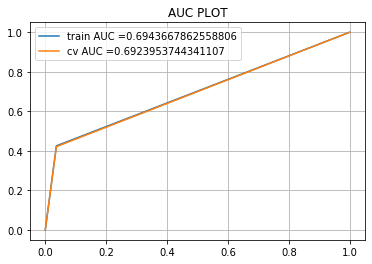

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.50000
2. Public Score : 0.50000

#### SVM with 1000 features ( 200 original,600 duplicate count,200 distance of mean  )

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(4,-9, num=100)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,6)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 15.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 48.6min
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed: 56.5min finished


best param : {'alpha': 9.770099572992247e-05}
best score : 0.8665770304658803


/home/roydeepak2406/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=400,tol=1e-3,alpha = best_param['alpha']) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7346295629037455
cv auc score : 0.7347699385230602


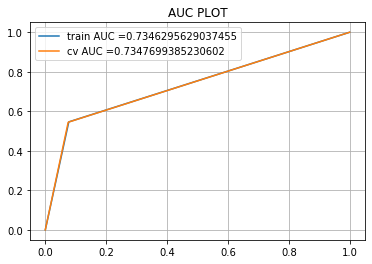

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=sgd.predict(test)
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_sgd.csv", index=False)

##### Kaggle Score
1. Private Score: 0.52990
2. Public Score : 0.53118

#### select k best features from 1000 features

In [0]:
train.shape[1]

1000

In [0]:
#https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(f_classif, k=(train.shape[1])-1)
k=k_best.fit(train,target)
features = k.transform(train)

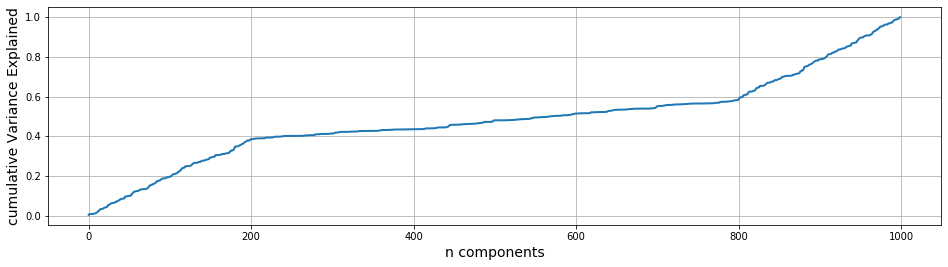

In [0]:
import matplotlib.pyplot as plt
cumVarianceExplained = np.cumsum( k.scores_ )/np.sum(k.scores_)
plt.figure( figsize=(16, 4))
plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=600)
selector.fit(train,target)
cols = selector.get_support(indices=True)
data_kbest = train.iloc[:,cols]

In [0]:
best_feat=[]
best_feat=data_kbest.columns
print(best_feat)

Index(['var_0', 'var_1', 'var_101', 'var_102', 'var_104', 'var_105', 'var_106',
       'var_107', 'var_108', 'var_109',
       ...
       'var_190distance_of_mean', 'var_191distance_of_mean',
       'var_192distance_of_mean', 'var_193distance_of_mean',
       'var_194distance_of_mean', 'var_195distance_of_mean',
       'var_196distance_of_mean', 'var_197distance_of_mean',
       'var_198distance_of_mean', 'var_199distance_of_mean'],
      dtype='object', length=600)


#### NB with  Top 600 features

In [0]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

gnb = GaussianNB(priors = [0.5,0.5])
params_NB = {'var_smoothing': np.logspace(1,-5, num=100)}
best_param=grid_search(gnb,params_NB,5,train[best_feat],target,3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 13.4min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 15.0min finished


best param : {'var_smoothing': 0.014174741629268049}
best score : 0.8587853222000852


In [0]:
best_param['var_smoothing']=0.014174741629268049

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train[best_feat], target, test_size = 0.20, stratify=target)
print('Train data shape : '+str(X_train.shape))
print('CV data shape : '+str(X_cv.shape))

Train data shape : (160000, 600)
CV data shape : (40000, 600)


In [0]:
y_train_pred,y_cv_pred=baseline_model(best_param,X_train,y_train,X_cv,y_cv,test,best_feat)

train auc score : 0.7116621587498332
cv auc score : 0.7068052594171998


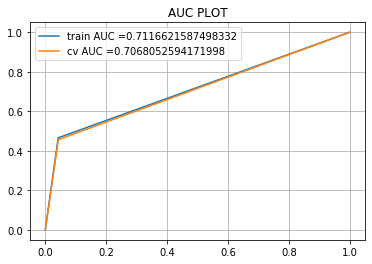

In [0]:
auc_plot(y_train,y_train_pred,y_cv,y_cv_pred)

##### Kaggle Score
1. Private Score: 0.71324
2. Public Score : 0.7111


#### SVM with Top 600 features

In [0]:
from sklearn.linear_model import SGDClassifier
params = {'alpha': np.logspace(2,-6, num=50)}
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',max_iter=100,tol=1e-3,class_weight = 'balanced')
best_param=grid_search(sgd,params,5,X_train,y_train,3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 24.5min
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed: 35.4min finished


best param : {'alpha': 0.05428675439323865}
best score : 0.8731166692114062


In [0]:
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=400,tol=1e-3,alpha = best_param['alpha']) 
sgd.fit(X_train ,y_train)
y_train_pred=sgd.predict(X_train)
y_cv_pred = sgd.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7968034203140598
cv auc score : 0.7887713323322243


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=sgd.predict(test[best_feat])
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_lgb.csv", index=False)

##### Kaggle Score
1. Private Score: 0.79074
2. Public Score : 0.79048

#### Decision Tree with Top 600 features

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight = 'balanced')

params={
       'max_depth' :[10,100,500,2000,5000,10000,20000],
       'min_samples_split':[10,1000,2000,5000]
}
best_param=grid_search(dtc,params,5,X_train,y_train,8)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 34.4min
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed: 176.6min finished


best param : {'max_depth': 10000, 'min_samples_split': 2000}
best score : 0.6986127658283461


In [0]:
best_param={'max_depth': 10000, 'min_samples_split': 2000}

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_cv_pred=dtc.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.689479729243881
cv auc score : 0.6457789568002124


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=dtc.predict(test[best_feat])
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_dtc.csv", index=False)

##### Kaggle Score
1. Private Score: 0.64147
2. Public Score : 0.64029

#### Voting Classifier with top 600 features

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
import numpy as np
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=0.014174741629268049)
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=1000,tol=1e-3,alpha = 0.05428675439323865) 
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')
vcf = VotingClassifier(estimators=[('gnb', gnb), ('sgd', sgd), ('dtc', dtc)], voting='hard')
vcf = vcf.fit(X_train, y_train)

y_train_pred=vcf.predict(X_train)
y_cv_pred = vcf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7875334515508833
cv auc score : 0.76589108376959


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=vcf.predict(test[best_feat])
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_vcf.csv", index=False)

##### Kaggle Score
1. Private Score: 0.77147
2. Public Score : 0.77101

#### Stacking Classifier with Top 600 features

In [0]:
#http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
gnb = GaussianNB(priors = [0.5,0.5],var_smoothing=0.014174741629268049)
sgd = SGDClassifier(loss = 'hinge', penalty = 'l2',class_weight = 'balanced',max_iter=1000,tol=1e-3,alpha = 0.05428675439323865) 
dtc = DecisionTreeClassifier(max_depth=best_param['max_depth'],min_samples_split=best_param['min_samples_split'],class_weight = 'balanced')

clf = StackingClassifier(classifiers=[sgd,dtc], meta_classifier=gnb)

clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_cv_pred = clf.predict(X_cv)
print('train auc score : '+str(roc_auc_score(y_train,y_train_pred)))
print('cv auc score : '+str(roc_auc_score(y_cv,y_cv_pred)))

train auc score : 0.7962259843797057
cv auc score : 0.7892530814521057


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
predictions=clf.predict(test[best_feat])
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_stc.csv", index=False)

##### Kaggle Score
1. Private Score: 0.79332
2. Public Score : 0.79205

#### lightgbm with no augmentation and 600 features

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,bagging_freq,bagging_seed,lambda_l1,lambda_l2,min_gain_to_split,min_child_weight,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin,min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc','tree_learner': 'serial','verbosity': -1,'boost': 'gbdt'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params['bagging_freq']=int(bagging_freq)
        params['bagging_seed']=int(bagging_seed)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        params['min_gain_to_split']=min_gain_to_split
        params['min_child_weight']=min_child_weight
        params['num_leaves'] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'bagging_freq' :(4,10),
                                            'bagging_seed':(5,10),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_gain_to_split':(.01,0.9),
                                            'min_child_weight':(5,20),
                                            'num_leaves': (10, 80),
                                            'feature_fraction': (0.01, 0.9),
                                            'bagging_fraction': (0.2, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(train[best_feat], target, init_round=5, opt_round=20, n_folds=5, random_seed=6)

|   iter    |  target   | baggin... | baggin... | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_ch... | min_da... | min_ga... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8987   |  0.9581   |  5.359    |  7.972    |  0.3912   |  0.7665   |  0.01283  |  0.3638   |  138.3    |  39.21    |  19.73    |  72.04    |  0.8876   |  92.33    |  31.26    |  0.8476   |
|  2        |  0.8749   |  0.297    |  8.713    |  6.253    |  0.09547  |  0.9441   |  0.8278   |  0.5231   |  133.6    |  48.38    |  11.75    |  60.81    |  0.3833   |  64.04    |  52.61    |  0.1144   |
|  3        |  0.8667   |  0.9728   |  8.552    |  8.398    |  0.3031   |  0.03619  |  0.8056   |  0.9731   |  56.78    |  53.68    |  8.984    |  31.26    |  0.383    |  66.6 

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]['num_leaves'] = int(round(opt_params[1]['num_leaves']))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['bagging_freq'] = int(round(opt_params[1]['bagging_freq']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['bagging_freq']=int(round(opt_params[1]['bagging_freq']))
opt_params[1]['bagging_seed']=int(round(opt_params[1]['bagging_seed']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params1=opt_params[1]
opt_params1

{'bagging_fraction': 0.9581058054813363,
 'bagging_freq': 5,
 'bagging_seed': 8,
 'boost_from_average': False,
 'feature_fraction': 0.39119472958742835,
 'is_unbalance': True,
 'lambda_l1': 0.7664992796883313,
 'lambda_l2': 0.012831985764133342,
 'learning_rate': 0.3638494444744881,
 'max_bin': 138,
 'max_depth': 39,
 'metric': 'auc',
 'min_child_weight': 19.727040637374927,
 'min_data_in_leaf': 72,
 'min_gain_to_split': 0.8875644851478631,
 'min_sum_hessian_in_leaf': 92.32667066664217,
 'num_leaves': 31,
 'objective': 'binary',
 'subsample': 0.84764245541438}

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
num_folds=5
folds = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state=2357)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(target))
new_features= [i for i in train[best_feat].columns]

In [0]:
len(new_features)

600

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
%%time
import lightgbm as lgb
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    
    X_train, y_train = train.iloc[trn_idx][new_features], target.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][new_features], target.iloc[val_idx]
 
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    
    clf1 = lgb.train(opt_params1, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds = 3000)
    oof[val_idx] = clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration)
    getVal[val_idx]+= clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    predictions += clf1.predict(test[new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    clf1.save_model('/content/drive/My Drive/model_600_best_iteration_{}.sav'.format(fold_), num_iteration=clf1.best_iteration) 

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.999975	valid_1's auc: 0.90146
[2000]	training's auc: 0.999975	valid_1's auc: 0.90146
[3000]	training's auc: 0.999975	valid_1's auc: 0.90146
Early stopping, best iteration is:
[749]	training's auc: 0.999975	valid_1's auc: 0.901465
Fold idx:2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.99999	valid_1's auc: 0.90117
[2000]	training's auc: 0.99999	valid_1's auc: 0.90117
[3000]	training's auc: 0.99999	valid_1's auc: 0.90117
Early stopping, best iteration is:
[718]	training's auc: 0.999989	valid_1's auc: 0.901194
Fold idx:3
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.999989	valid_1's auc: 0.903398
[2000]	training's auc: 0.999989	valid_1's auc: 0.903398
[3000]	training's auc: 0.999989	valid_1's auc: 0.903398
Early stopping, best iteration is:
[793]	training's auc: 0.999989	valid_1's auc: 0.9

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(target, oof)))


 >> CV score: 0.90153 


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test1=test1.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/submission_600.csv", index=False)

##### Kaggle Score
1. Private Score: 0.91352
2. Public Score : 0.91662

The above private leaderboard scores is within top 5 percent.

#### lightgbm 600 features with augmentation

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
num_folds=5
folds = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state=2357)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(target))
new_features= [i for i in train[best_feat].columns]

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
%%time
import lightgbm as lgb
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    
    X_train, y_train = train.iloc[trn_idx][new_features], target.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][new_features], target.iloc[val_idx]
    
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)

    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    
    clf1 = lgb.train(opt_params1, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds = 3000)
    oof[val_idx] = clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration)
    getVal[val_idx]+= clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    predictions += clf1.predict(test[new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    clf1.save_model('/content/drive/My Drive/model_600_best_iteration_{}.sav'.format(fold_), num_iteration=clf1.best_iteration) 

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.99995	valid_1's auc: 0.908006
[2000]	training's auc: 0.999981	valid_1's auc: 0.908467
[3000]	training's auc: 0.999981	valid_1's auc: 0.908467
Early stopping, best iteration is:
[260]	training's auc: 0.989363	valid_1's auc: 0.910225
Fold idx:2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.999947	valid_1's auc: 0.906214
[2000]	training's auc: 0.999982	valid_1's auc: 0.907211
[3000]	training's auc: 0.999982	valid_1's auc: 0.907211
Early stopping, best iteration is:
[230]	training's auc: 0.98743	valid_1's auc: 0.907493
Fold idx:3
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.999933	valid_1's auc: 0.910988
[2000]	training's auc: 0.999968	valid_1's auc: 0.911782
[3000]	training's auc: 0.999968	valid_1's auc: 0.911782
Early stopping, best iteration is:
[240]	training's auc: 0.987877	valid_1's a

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(target, oof)))


 >> CV score: 0.90359 


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_600_1.csv", index=False)

##### Kaggle Score
1. Private Score: 0.91485
2. Public Score : 0.91802


The above private leaderboard scores is within top 5 percent.

#### Light gbm model with 1000 features ( 200 original,600 duplicate count,200 distance of mean  )

In [0]:
#basic tools 
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,bagging_freq,bagging_seed,lambda_l1,lambda_l2,min_gain_to_split,min_child_weight,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin,min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc','tree_learner': 'serial','verbosity': -1,'boost': 'gbdt'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params['bagging_freq']=int(bagging_freq)
        params['bagging_seed']=int(bagging_seed)
        params['lambda_l1']=max(min(lambda_l1, 1), 0)
        params['lambda_l2']=max(min(lambda_l1, 1), 0)
        params['min_gain_to_split']=min_gain_to_split
        params['min_child_weight']=min_child_weight
        params['num_leaves'] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        #evaluate cv for above paramters
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        
        #return max mean for multiple folds
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'bagging_freq' :(4,10),
                                            'bagging_seed':(5,10),
                                            'lambda_l1': (0.01,1),
                                            'lambda_l2': (0.01,1),
                                            'min_gain_to_split':(.01,0.9),
                                            'min_child_weight':(5,20),
                                            'num_leaves': (10, 80),
                                            'feature_fraction': (0.01, 0.9),
                                            'bagging_fraction': (0.2, 1),
                                            'max_depth': (5, 80),
                                            'max_bin':(20,150),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(train, target, init_round=5, opt_round=20, n_folds=5, random_seed=6)

|   iter    |  target   | baggin... | baggin... | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_ch... | min_da... | min_ga... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8989   |  0.9581   |  5.359    |  7.972    |  0.3912   |  0.7665   |  0.01283  |  0.3638   |  138.3    |  39.21    |  19.73    |  72.04    |  0.8876   |  92.33    |  31.26    |  0.8476   |
|  2        |  0.8687   |  0.297    |  8.713    |  6.253    |  0.09547  |  0.9441   |  0.8278   |  0.5231   |  133.6    |  48.38    |  11.75    |  60.81    |  0.3833   |  64.04    |  52.61    |  0.1144   |
|  3        |  0.8631   |  0.9728   |  8.552    |  8.398    |  0.3031   |  0.03619  |  0.8056   |  0.9731   |  56.78    |  53.68    |  8.984    |  31.26    |  0.383    |  66.6 

In [0]:
#https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
opt_params[1]['num_leaves'] = int(round(opt_params[1]['num_leaves']))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['bagging_freq'] = int(round(opt_params[1]['bagging_freq']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['bagging_freq']=int(round(opt_params[1]['bagging_freq']))
opt_params[1]['bagging_seed']=int(round(opt_params[1]['bagging_seed']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params1=opt_params[1]
opt_params1

{'bagging_fraction': 0.9581058054813363,
 'bagging_freq': 5,
 'bagging_seed': 8,
 'boost_from_average': False,
 'feature_fraction': 0.39119472958742835,
 'is_unbalance': True,
 'lambda_l1': 0.7664992796883313,
 'lambda_l2': 0.012831985764133342,
 'learning_rate': 0.3638494444744881,
 'max_bin': 138,
 'max_depth': 39,
 'metric': 'auc',
 'min_child_weight': 19.727040637374927,
 'min_data_in_leaf': 72,
 'min_gain_to_split': 0.8875644851478631,
 'min_sum_hessian_in_leaf': 92.32667066664217,
 'num_leaves': 31,
 'objective': 'binary',
 'subsample': 0.84764245541438}

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
num_folds=5
folds = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state=2357)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(target))
new_features= [i for i in train.columns]

In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
%%time
import lightgbm as lgb
print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    
    X_train, y_train = train.iloc[trn_idx][new_features], target.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][new_features], target.iloc[val_idx]
    
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    
    clf1 = lgb.train(opt_params1, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds = 1000)
    oof[val_idx] = clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration)
    getVal[val_idx]+= clf1.predict(train.iloc[val_idx][new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    predictions += clf1.predict(test[new_features], num_iteration=clf1.best_iteration) / folds.n_splits
    clf1.save_model('/content/drive/My Drive/proj_1/model_1000_iteration_{}.sav'.format(fold_), num_iteration=clf1.best_iteration) 

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.999974	valid_1's auc: 0.909328
[2000]	training's auc: 0.999989	valid_1's auc: 0.910062
Early stopping, best iteration is:
[1246]	training's auc: 0.999989	valid_1's auc: 0.910127
Fold idx:2
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.999971	valid_1's auc: 0.906677
Early stopping, best iteration is:
[263]	training's auc: 0.990709	valid_1's auc: 0.907424
Fold idx:3
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.999961	valid_1's auc: 0.912099
[2000]	training's auc: 0.999984	valid_1's auc: 0.91288
Early stopping, best iteration is:
[1273]	training's auc: 0.999984	valid_1's auc: 0.912944
Fold idx:4
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.999978	valid_1's auc: 0.905293
[2000]	training's auc: 0.999994	valid_1's auc: 0.906328
Early stopping, best 

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(target, oof)))


 >> CV score: 0.90015 


In [0]:
#https://www.kaggle.com/super13579/lgbm-with-duplicate-flag-value-0-923?scriptVersionId=12330297
test1=test.reset_index()
submission = pd.DataFrame({"ID_code": test1.ID_code.values})
submission['target'] = predictions
submission.to_csv("/content/drive/My Drive/proj_1/submission_1000.csv", index=False)

##### Kaggle Score
1. Private Score: 0.91553
2. Public Score : 0.91881

The above private leaderboard scores is within top 5 percent.

### Conclusion

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Model","Featurization","Kaggle Private LB AUC"]
x.add_row(["Gaussian Naive Bayes ","200 original features",0.80495])
x.add_row(["SVM(Suport Vector Machines) ","200 original features", 0.76828])
x.add_row(["XGBOOST ","200 original features", 0.67655])
x.add_row(["Lightgbm ","200 original features",0.86914])

x.add_row([" Gaussian Naive Bayes + TruncatedSVD for top 125 features ","Duplicate value flag ", 0.76306])
x.add_row([" Gaussian Naive Bayes + TruncatedSVD for top 150 features ","Duplicate value flag ", 0.77180])
x.add_row(["SVM(Suport Vector Machines)+ TruncatedSVD for top 150 features","Duplicate value flag ", 0.73673])
x.add_row(["Lightgbm + TruncatedSVD for top 150 features","Duplicate value flag ", 0.84961])

x.add_row([" Gaussian Naive Bayes + selectkbest for top 200 features","Duplicate value flag ", 0.78190])
x.add_row(["SVM(Suport Vector Machines) + selectkbest for top 200 features","Duplicate value flag ", 0.73442])
x.add_row(["Lightgbm + selectkbest for top 200 features","Duplicate value flag ", 0.87081])

x.add_row([" Gaussian Naive Bayes + all 400 features(200 original + 200 duplicate flag) ","Duplicate value flag ", 0.75314])
x.add_row(["SVM(Suport Vector Machines) + all 400 features(200 original + 200 duplicate flag)","Duplicate value flag ", 0.76438])
x.add_row(["XGBOOST + all 400 features(200 original + 200 duplicate flag)","Duplicate value flag ", 0.71413])
x.add_row(["Lightgbm + all 400 features(200 original + 200 duplicate flag) ","Duplicate value flag ", 0.86945])

x.add_row(["Gaussian Naive Bayes with only 8 features","Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.50000])
x.add_row(["Lightgbm with only 8 features","Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.55095])

x.add_row(["Gaussian Naive Bayes with top 190 features ","200 original +Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.50000])
x.add_row(["Lightgbm with top 190 features","200 original + Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.87044])

x.add_row(["Gaussian Naive Bayes with all 208 features ","200 original +Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.79956])
x.add_row(["SVM(Suport Vector Machines) with all 208 features","200 original + Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.76889])
x.add_row(["Decision Tree with all 208 features ","200 original +Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.62694])
x.add_row(["Voting Classifier with all 208 features","200 original + Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.77758])
x.add_row(["Stacking classifier with all 208 features","200 original + Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.76782])
x.add_row(["lightgbm with all 208 features ","200 original +Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.88797])
x.add_row(["lightgbm with all 208 features and augmentation ","200 original +Sum,Mean,Median,std,skew,Min,Max and kurtosis",0.89211])


x.add_row(["Gaussian Naive Bayes with all 1000 features ","1000 features (original+duplicate count+distance of mean)", 0.5000])
x.add_row(["SVM with all 1000 features","1000 features (original+duplicate count+distance of mean)", 0.52990])

x.add_row(["Gaussian Naive Bayes with top 600 features ","1000 features (original+duplicate count+distance of mean)",0.71324])
x.add_row(["SVM with top 600 features ","1000 features (original+duplicate count+distance of mean)", 0.79074])
x.add_row(["Decision Tree with top 600 features ","1000 features (original+duplicate count+distance of mean)", 0.64147])
x.add_row(["Voting Classifier with top 600 features ","1000 features (original+duplicate count+distance of mean)",  0.77147])
x.add_row(["Stacking Classifier with top 600 features ","1000 features (original+duplicate count+distance of mean)", 0.79332])
x.add_row(["lightgbm with top 600 features ","1000 features (original+duplicate count+distance of mean)",0.91352])
x.add_row(["lightgbm with top 600 features and augmentation ","1000 features (original+duplicate count+distance of mean)",0.91485])

x.add_row(["Lightgbm with all 1000 features and augmentation","1000 features (original+duplicate count+distance of mean)",0.91553])

print(x)



+-----------------------------------------------------------------------------------+--------------------------------------------------------------+-----------------------+
|                                   Feature Model                                   |                        Featurization                         | Kaggle Private LB AUC |
+-----------------------------------------------------------------------------------+--------------------------------------------------------------+-----------------------+
|                               Gaussian Naive Bayes                                |                    200 original features                     |        0.80495        |
|                            SVM(Suport Vector Machines)                            |                    200 original features                     |        0.76828        |
|                                      XGBOOST                                      |                    200 original features         

## Summary

I have done the following EDA:
1. Dropped if any Duplicates data are there and kept first record.There are no duplicate data.
2. Checked Value count for two Classes.It seems to be Imbalance data.
3. Checked for Missing values . There are no missing values.
4. Plotted box plot for some of features. There are some outliers in the data.
5. Then I have removed the outliers from by data using IQR range formula.
6. Checked for correlation between features.There are very less correlation between all features.
7. Plotted Histogram plot and observed that many values are repeated(high frequency) for each feature.

Then I have chosen Gaussian Naive Bayes as my baseline model as all the features have very less correlation.

I have used the below models without any featurization:
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Xgboost
4. Lightgbm

The Lightgbm have performed better of all models with AUC equal to 0.86914.
<br>
<br>
<br>

### Featurization 1

I have used duplicate value flag featurization for each of 200 original features.
It have resulted into total 400 features(200 original + 200 duplicate ).

<br>

#### TRUNCATEDSVD to select top 150 features

Then I have selected the top 150 features by using TRUNCATEDSVD and plotting cummulative variance.
Thereafter I used the below models with top 150 features:
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Lightgbm

The Lightgbm have performed better of all models with AUC equal to 0.84961.

<br>

#### selectkbest to select top 200 features

Then I have selected the top 200 features by using selectkbest and plotting cummulative variance.
Thereafter I used the below models with top 200 features:
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Lightgbm

The Lightgbm have performed better of all models with AUC equal to 0.87081.

<br>


#### All 400 features

I have used the below models :
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Xgboost
4. Lightgbm

The Lightgbm have performed better of all models with AUC equal to 0.86945.
<br>
<br>
<br>

### Featurization 2
I have used Sum,Mean,Median,std,skew,Min,Max and kurtosis featurization for each of 200 columns.
It have resulted into total 208 features(200 original + 8 features ).

<br>

#### Only 8 features (Sum,Mean,Median,std,skew,Min,Max and kurtosis)

I have used the below models:
1. Gaussian Naive Bayes
2. Lightgbm

The Lightgbm have performed better of two model with AUC equal to 0.55095.
The AUC have reduced drastically from 0.87 to 0.55095.

<br>

#### selectkbest to select top 190 features

Then I have selected the top 190 features by using selectkbest and plotting cummulative variance.
Thereafter I used the below models with top 190 features:
1. Gaussian Naive Bayes
2. Lightgbm

The Lightgbm have performed better of all models with AUC equal to 0.87044.

<br>

#### All 208 features

I have used the below models :
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Decision Tree
4. Voting Classifier 
5. Stacking classifier
6. Lightgbm with  no augmentation
7. Lightgbm with augmentation

The Lightgbm with augmentation have performed better of all models with AUC equal to 0.89211.

<br>
<br>
<br>

### Featurization 3

First, I have Combined  train data and only test data which doesn't have all features with duplicate value.
Thereafter I have used combined (train and test real) data for below featurization:
1. Duplicate Count: Take minimum of 10 and value count for that particular value.
2. Duplicate Value Count >2 : Multiply actual value of that feature with duplicate count (if only duplicate count greater than 2) 
3. Duplicate Value Count >4 : Multiply actual value of that feature with duplicate count (if only duplicate count greater than 4) 
4. Distance of mean : Calculate difference between current value and mean of that particular feature .Then mutiply it with duplicate count feature.

Hence , I have created 800 new features (total=1000 features(200 original+800 new)).

<br>

#### selectkbest to select top 600 features

Then I have selected the top 600 features by using selectkbest and plotting cummulative variance.
Thereafter I used the below models with top 600 features:
1. Gaussian Naive Bayes
2. SVM
3. Decision Tree
4. Voting Classifier
5. Stacking Classifier
6. Lightgbm with no augmentation
7. Lightgbm with augmentation

The Lightgbm  with augmentation have performed better of all models with AUC equal to 0.91485.
This AUC score falls within top 5 percent on Kaggle private Leaderboard.

<br>

#### All 1000 features

I have used the below models :
1. Gaussian Naive Bayes
2. Support Vector Machine
3. Lightgbm with augmentation

The Lightgbm with augmentation have performed better of all models with AUC equal to 0.91553.
This AUC score falls within top 5 percent on Kaggle private Leaderboard.

